In [1]:

import numpy as np
import matplotlib.pyplot as plt
import random as random
import math as math
from WeinerGenerator import getWeiner

b = -0.05

t0 = 0
tend = 1
steps = 100000
dt = (tend-t0)/steps
h = 1.0
threshold = h/2
Kbar = 1.0

def K(z):
    if z <= threshold:
        K = z*(h-2*z)*Kbar
    else:
        K = (h-z)*(-h+2*z)*Kbar
    return K

def dKdz(z):
    if z <= threshold:
        dKdz = h-4*z
    else:
        dKdz = 3*h-4*z
    return dKdz

class Particle():
    def __init__(self, z):
        self.z = z

    def simulate(self, ts, dws, dt):
        zs = []
        for index, t in enumerate(ts):
            #Story history
            zs.append(self.z)

            #Advance
            z0 = self.z
            z1 = z0 + dKdz(z0)*dt + math.sqrt(2*K(z0))*dws[index] #last dws gets used here but the resulting zs doesn't get stored

            #Store result
            self.z = z1 

            #Correct if out of bounds
            self.correctBounds()

        return zs

    def correctBounds(self):
        if abs(self.z) > 2*h:
            print("Severe out of bounds")
            exit()
        if self.z < 0:
            self.z = - self.z
        if self.z > h:
            self.z = 2*h - self.z
        return


No handles with labels found to put in legend.


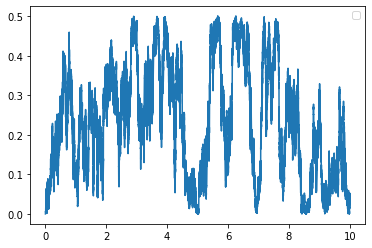

In [2]:
def plotRealization():
    ts, ws, dws, dt = getWeiner(1000000,10)
    particle = Particle(0)
    zs = particle.simulate(ts, dws, dt)

    plt.plot(ts,zs)

plotRealization()

plt.legend()
plt.show()